In [1]:
%matplotlib inline
from svm_classifier import getClassifierAndVectorizer
import numpy as np
import glob, os, pickle
import math
import pickle
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB


SVM with Vector Featues


In [2]:
clf, vectorizer = getClassifierAndVectorizer()

imported correctly


In [3]:
def extractor(n=100):
    #n is number of opinions from each year"
    filename = "sentences_new/"
    datafiles = sorted(glob.glob(filename + "sent_????"))
    test_files = []
    year = []
    cases_per_year = []
    y = 1891
    for d in datafiles:
        sentences = sorted(glob.glob(d + "/*.txt"))
        for i, sentence in enumerate(sentences):
            if i >= n:
                break
            myfile = open(sentence,'r') 
            data=myfile.read().replace('\n', '')
            test_files.append(data)
            year.append(y)
            myfile.close()
        cases_per_year.append(len(sentences))
        y += 1
    return test_files, year, cases_per_year

In [4]:
#x_test = vectorizer.transform(data_to_predict)
clf, vectorizer = getClassifierAndVectorizer()
cases, year_of_case, cases_per_year = extractor()
x_test = vectorizer.transform(cases)
prediction = clf.predict(x_test)


imported correctly


In [ ]:
n

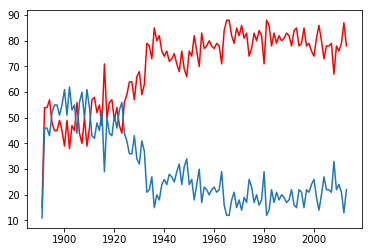

In [7]:
#for i, j in zip(attrib, prediction):
#        print('%r => %s' % (i, j))

#consPerYear = dict((yr,0) for yr in range(1891, 2014)) 
#deonPerYear = dict((yr,0) for yr in range(1891, 2014))
years = range(1891,2014)
consPerYear, deonPerYear = np.zeros(len(years)), np.zeros(len(years))
for i, j in zip(year_of_case, prediction):
    if j == "cons":
        consPerYear[i - 1891] += 1
    if j == "deon":
        deonPerYear[i - 1891] += 1
        
        
plt.plot(years, consPerYear, 'r')
#plt.plot(years, deonPerYear)
#plt.show()

Text(0,0.5,'Percentage of Cases with Cons Reasoning')

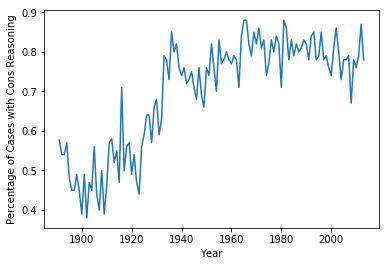

In [22]:
percentages = [] #consPerYear / cases_per_year
for i, j in zip(consPerYear, cases_per_year):
    if j < 100:
        percentages.append(i/float(j))
    else:
        percentages.append(i/100)
plt.plot(years, percentages)
plt.xlabel("Year")
plt.ylabel("Percentage of Cases with Cons Reasoning")

In [34]:
def MajVsDisExtractor():

    filename = "sentences_new/"
    datafiles = sorted(glob.glob(filename + "sent_????"))
    test_files = []
    maj_op = []
    dis_op = []

    d = datafiles[1922-1891]
    sentences = sorted(glob.glob(d + "/*.txt"))

    for i in range(len(sentences)):
        myfile = open(sentences[i],'r')
        data=myfile.read().replace('\n', '')
        if "MajOp" in sentences[i]:
            maj_op.append(data)
        elif "DisOp" in sentences[i]:
            dis_op.append(data)
    
        myfile.close()
    return maj_op, dis_op

In [35]:
majOp, disOp = MajVsDisExtractor()
majTest = vectorizer.transform(majOp)
predictionMaj = clf.predict(majTest)
disTest = vectorizer.transform(disOp)
predictionDis = clf.predict(disTest)

majOp, disOp = MajVsDisExtractor()
majTest = vectorizer.transform(majOp)
predictionMaj = clf.predict(majTest)
disTest = vectorizer.transform(disOp)
predictionDis = clf.predict(disTest)

0.48475909537856443
0.6666666666666666


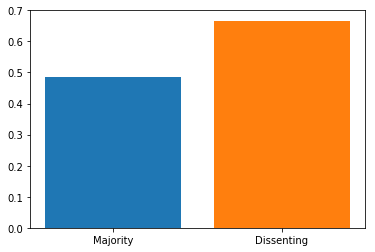

In [36]:
percentMajCons = predictionMaj.tolist().count('cons') / len(majOp)
percentDisCons = predictionDis.tolist().count('cons') / len(disOp)
plt.bar("Majority", percentMajCons)
plt.bar("Dissenting", percentDisCons)
print(percentMajCons)
print(percentDisCons)
#1922

In [ ]:
#plots we want to make


#percentage of cons reasoning before and after econ seminar
#judge reasoning over time (do judges stay persistently deon/cons?)
#deon/cons vs educational instiution
#deon/cons vs location?
#deon/cons for topics (how do we identify topics)